<a href="https://colab.research.google.com/github/AbdullahAlTalaq/About-Me/blob/main/Pancriatc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv('/content/Pancreatic Cancer (cleaned).csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample_id                590 non-null    object 
 1   patient_cohort           590 non-null    object 
 2   sample_origin            590 non-null    object 
 3   age                      590 non-null    int64  
 4   sex                      590 non-null    object 
 5   diagnosis                590 non-null    int64  
 6   stage                    590 non-null    object 
 7   benign_sample_diagnosis  590 non-null    object 
 8   plasma_CA19_9            590 non-null    float64
 9   creatinine               590 non-null    float64
 10  LYVE1                    590 non-null    float64
 11  REG1B                    590 non-null    float64
 12  TFF1                     590 non-null    float64
 13  REG1A                    590 non-null    float64
dtypes: float64(6), int64(2), o

In [ ]:
df = df.drop('sample_id', axis=1)

#making onehotencooding to object dtype
first extract the categorical columns from the feature set (X_categorical).
then use the OneHotEncoder to perform one-hot encoding, setting drop='first' to avoid the dummy variable trap and sparse=False to get a dense array.
The resulting encoded features are stored in a new DataFrame (X_encoded).

In [ ]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [ ]:
#making onehotencooding to object dtype
categorical_cols = ['patient_cohort', 'sample_origin', 'sex', 'stage', 'benign_sample_diagnosis']

In [ ]:
X_categorical = X[categorical_cols]


In [ ]:
X_encoded = pd.get_dummies(X,columns=categorical_cols,drop_first=True)

In [ ]:
encoder = OneHotEncoder(drop='first', sparse=False)

In [ ]:
X_encoded = pd.DataFrame(encoder.fit_transform(X_categorical), columns=encoder.get_feature_names_out(categorical_cols))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 73 columns):
 #   Column                                                                                Non-Null Count  Dtype  
---  ------                                                                                --------------  -----  
 0   patient_cohort_Cohort2                                                                590 non-null    float64
 1   sample_origin_ESP                                                                     590 non-null    float64
 2   sample_origin_LIV                                                                     590 non-null    float64
 3   sample_origin_UCL                                                                     590 non-null    float64
 4   sex_M                                                                                 590 non-null    float64
 5   stage_IB                                                                             

SVMSMOTH

In [ ]:
from imblearn.over_sampling import SVMSMOTE


In [ ]:
svm_smote = SVMSMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = svm_smote.fit_resample(X_encoded, y)

RandomForest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.704
Classification Report for Random Forest:
              precision    recall  f1-score   support

           1       0.69      0.84      0.76        43
           2       0.74      0.58      0.65        50
           3       0.68      0.72      0.70        32

    accuracy                           0.70       125
   macro avg       0.70      0.71      0.70       125
weighted avg       0.71      0.70      0.70       125



In [ ]:
et_classifier = ExtraTreesClassifier(random_state=42)
et_classifier.fit(X_train, y_train)

y_pred_et = et_classifier.predict(X_test)
accuracy_et = accuracy_score(y_test, y_pred_et)
print("\nExtra Trees Classifier Accuracy:", accuracy_et)
print("Classification Report for Extra Trees:")
print(classification_report(y_test, y_pred_et))


Extra Trees Classifier Accuracy: 0.736
Classification Report for Extra Trees:
              precision    recall  f1-score   support

           1       0.69      0.88      0.78        43
           2       0.79      0.62      0.70        50
           3       0.74      0.72      0.73        32

    accuracy                           0.74       125
   macro avg       0.74      0.74      0.73       125
weighted avg       0.75      0.74      0.73       125



In [ ]:
unique_values =df['benign_sample_diagnosis'].unique()

for i in unique_values:
  print(i)

Pancreatitis
Pancreatitis (Pseudocyst)
Serous cystadenoma - NOS
Gallstones
Pancreatitis (Alcohol-Chronic-Pseuodcyst)
Ill defined lesion in uncinate process
Pancreatitis (Chronic)
Pancreatitis (Abscess)
Cholecystitis (Chronic) Cholelithiasis
Cholecystitis
Premalignant lesions-Mucinous cystadenoma-NOS
Choledochal Cyst
Abdominal Pain
Cholecystitis (Chronic)
Pancreatitis (Alcohol-Chronic)
Premalignant lesions-Mucinous cystadenocarcinoma-noninvasive
Pancreatitis (Gallstone)
Pancreato-jejunostomy Anastomoses Stricture
Pancreatitis (Idiopathic)
Gallstones - Incidental
Pancreatitis (Hypertriglyceridemia)
Choledocholiathiasis
Premalignant lesions-Adenoma-NOS
Pancreatitis (Chronic-Pseudocyst)
Ischaemic Common Bile Duct Stricture
Premalignant lesions-Villous adenoma-NOS
Biliary Stricture (Secondary to Stent)
Pancreatitis (Autoimmune)
Pancreatitis (Chronic) (Later became PDAC)
Pancreatitis (Alcohol)
Premalignant lesions-Tubular adenoma-NOS
Pancreatitis (Acute)
Serous microcystic adenoma
Duodenitis

In [ ]:
# Convert 'benign_sample_diagnosis' column to a categorical and then use factorize
df['benign_sample_diagnosis'] = pd.factorize(df['benign_sample_diagnosis'])[0].astype(float)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      590 non-null    float64
 1   sex                      590 non-null    float64
 2   diagnosis                590 non-null    float64
 3   stage                    590 non-null    float64
 4   benign_sample_diagnosis  590 non-null    float64
 5   plasma_CA19_9            590 non-null    float64
 6   creatinine               590 non-null    float64
 7   LYVE1                    590 non-null    float64
 8   REG1B                    590 non-null    float64
 9   TFF1                     590 non-null    float64
 10  REG1A                    590 non-null    float64
dtypes: float64(11)
memory usage: 50.8 KB


In [ ]:
df = df.drop('sample_id', axis=1)

In [ ]:
df['sex'] = pd.factorize(df['sex'])[0].astype(float)


In [ ]:
df['diagnosis'].unique()

array([1, 2, 3])

In [ ]:
df = df.drop(['sample_origin', 'patient_cohort'], axis=1)

In [ ]:
df['stage'] = pd.factorize(df['stage'])[0].astype(float)

In [ ]:
df['age'] = df['age'].astype(float)
df['diagnosis'] = df['diagnosis'].astype(float)

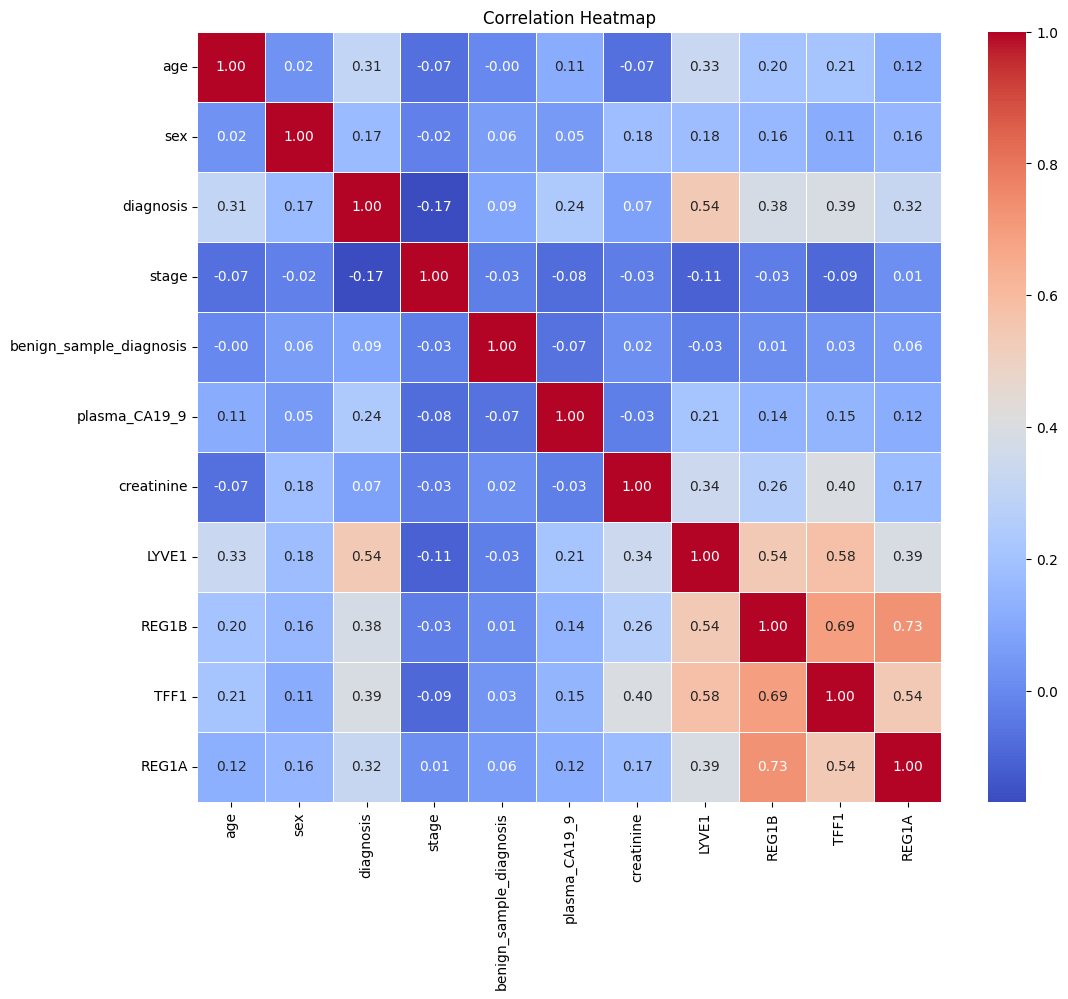

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
from imblearn.over_sampling import SVMSMOTE


X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

svm_smote = SVMSMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = svm_smote.fit_resample(X, y)

In [ ]:
print("X_resampled shape:", X_resampled.shape)
print("y_resampled shape:", y_resampled.shape)

X_resampled shape: (624, 10)
y_resampled shape: (624,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.792
Classification Report for Random Forest:
              precision    recall  f1-score   support

         1.0       0.79      0.88      0.84        43
         2.0       0.86      0.62      0.72        50
         3.0       0.73      0.94      0.82        32

    accuracy                           0.79       125
   macro avg       0.79      0.81      0.79       125
weighted avg       0.80      0.79      0.79       125



Random sample

In [ ]:
from sklearn.utils import resample

df_combined = pd.concat([X, y], axis=1)

majority_class = df_combined[df_combined['diagnosis'] == 1]
minority_class = df_combined[df_combined['diagnosis'] == 2]

minority_class_oversampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

df_oversampled = pd.concat([majority_class, minority_class_oversampled])


X_oversampled = df_oversampled.drop('diagnosis', axis=1)
y_oversampled = df_oversampled['diagnosis']

In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8783783783783784
Classification Report for Random Forest:
              precision    recall  f1-score   support

         1.0       0.85      0.92      0.88        37
         2.0       0.91      0.84      0.87        37

    accuracy                           0.88        74
   macro avg       0.88      0.88      0.88        74
weighted avg       0.88      0.88      0.88        74



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=0.2, random_state=42)

et_classifier = ExtraTreesClassifier(random_state=42)
et_classifier.fit(X_train, y_train)

y_pred_et = et_classifier.predict(X_test)
accuracy_et = accuracy_score(y_test, y_pred_et)
print("\nExtra Trees Classifier Accuracy:", accuracy_et)
print("Classification Report for Extra Trees:")
print(classification_report(y_test, y_pred_et))


Extra Trees Classifier Accuracy: 0.8783783783783784
Classification Report for Extra Trees:
              precision    recall  f1-score   support

         1.0       0.82      0.97      0.89        37
         2.0       0.97      0.78      0.87        37

    accuracy                           0.88        74
   macro avg       0.89      0.88      0.88        74
weighted avg       0.89      0.88      0.88        74



In [ ]:
!pip install -U imbalanced-learn





     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


Svmsmoth

In [ ]:
from imblearn.over_sampling import SVMSMOTE

msmote = SVMSMOTE(sampling_strategy='auto', random_state=42)

X_resampled, y_resampled = msmote.fit_resample(X, y)
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='diagnosis')], axis=1)
X_oversampled = df_resampled.drop('diagnosis', axis=1)
y_oversampled = df_resampled['diagnosis']

In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.792
Classification Report for Random Forest:
              precision    recall  f1-score   support

         1.0       0.79      0.88      0.84        43
         2.0       0.86      0.62      0.72        50
         3.0       0.73      0.94      0.82        32

    accuracy                           0.79       125
   macro avg       0.79      0.81      0.79       125
weighted avg       0.80      0.79      0.79       125



BorderlineSMOTE

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE

borderline_smote = BorderlineSMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = borderline_smote.fit_resample(X, y)
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='diagnosis')], axis=1)
X_oversampled = df_resampled.drop('diagnosis', axis=1)
y_oversampled = df_resampled['diagnosis']

In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.792
Classification Report for Random Forest:
              precision    recall  f1-score   support

         1.0       0.83      0.88      0.85        43
         2.0       0.84      0.62      0.71        50
         3.0       0.71      0.94      0.81        32

    accuracy                           0.79       125
   macro avg       0.79      0.81      0.79       125
weighted avg       0.80      0.79      0.79       125



In [ ]:
et_classifier = ExtraTreesClassifier(random_state=42)
et_classifier.fit(X_train, y_train)

y_pred_et = et_classifier.predict(X_test)
accuracy_et = accuracy_score(y_test, y_pred_et)
print("\nExtra Trees Classifier Accuracy:", accuracy_et)
print("Classification Report for Extra Trees:")
print(classification_report(y_test, y_pred_et))


Extra Trees Classifier Accuracy: 0.808
Classification Report for Extra Trees:
              precision    recall  f1-score   support

         1.0       0.75      0.98      0.85        43
         2.0       0.94      0.60      0.73        50
         3.0       0.78      0.91      0.84        32

    accuracy                           0.81       125
   macro avg       0.82      0.83      0.81       125
weighted avg       0.83      0.81      0.80       125



In [ ]:

!apt-get -qq install -y imbalanced-learn

E: Unable to locate package imbalanced-learn


In [ ]:
from imblearn.under_sampling import NeighbourhoodCleaningRule

from sklearn.utils import resample

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

df_combined = pd.concat([X, y], axis=1)

majority_class = df_combined[df_combined['diagnosis'] == 1]
minority_class = df_combined[df_combined['diagnosis'] == 2]

minority_class_oversampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

df_oversampled = pd.concat([majority_class, minority_class_oversampled])


X_oversampled = df_oversampled.drop('diagnosis', axis=1)
y_oversampled = df_oversampled['diagnosis']

ncr = NeighbourhoodCleaningRule(sampling_strategy='auto', n_neighbors=3)
X_cleaned, y_cleaned = ncr.fit_resample(X_oversampled, y_oversampled )
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.953125
Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      0.98      0.99        41
         2.0       0.95      0.91      0.93        23
         3.0       0.00      0.00      0.00         0

    accuracy                           0.95        64
   macro avg       0.65      0.63      0.64        64
weighted avg       0.98      0.95      0.97        64



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
